   Temperature   Humidity  Water Level  Vibration  Seepage Rate  Risk Level  \
0    31.570248  84.804806    24.860298   0.125862      4.092855           0   
1    45.437739  51.134814    60.217705   1.435171      1.763407           0   
2    18.084705  53.159691    24.121218   0.810651      3.570699           0   
3    30.062129  52.189602    23.488271   0.948083      3.208766           0   
4    39.731145  50.285932    61.245116   0.434409      3.818095           0   

  measurement_date  upstream_water_level  downstream_water_level  inflow_rate  \
0       2011-04-17                159.94                   64.82       6500.0   
1       2011-04-18                159.62                   65.20       6100.0   
2       2011-04-19                159.30                   64.85       5800.0   
3       2011-04-20                158.94                   64.58       5800.0   
4       2011-04-21                158.70                   65.14       6600.0   

   outflow_rate  
0        7490.0  
1 

C:\Users\salik\AppData\Local\Temp\ipykernel_2844\3272181454.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seepage_data.dropna(inplace=True)


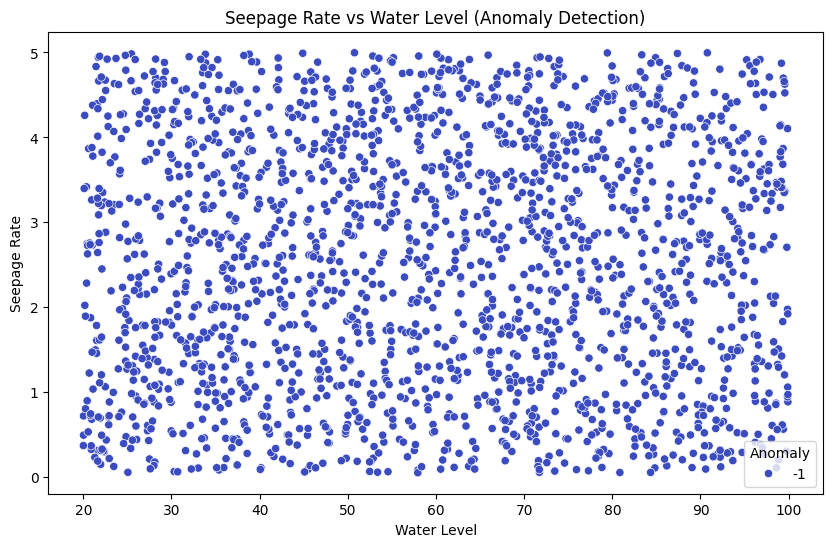

Mean Absolute Error for Seepage Rate Prediction: 1.21


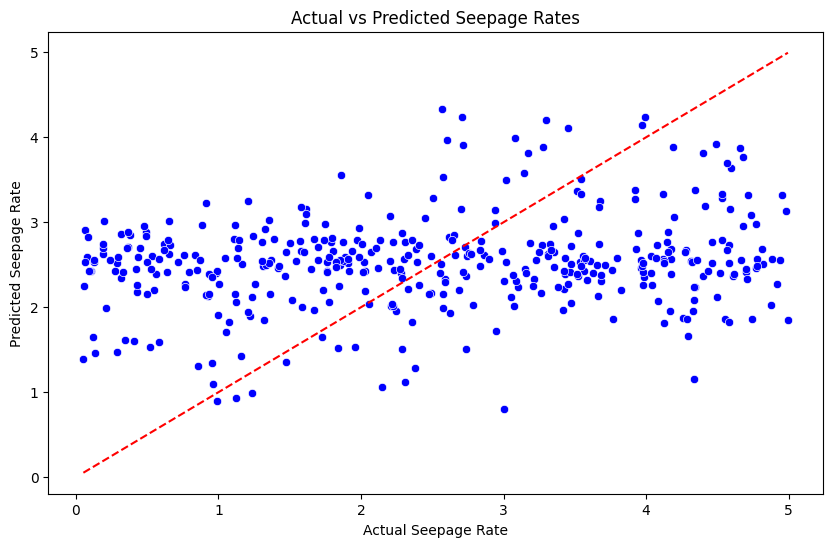

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the merged dataset
data = pd.read_csv("c:/Users/salik/Downloads/merged_dam_safety_dataset (2).csv")
print(data.head())
# Step 2: Data Preprocessing
# Selecting expanded attributes to improve prediction accuracy
expanded_attributes = [
    'Temperature','Humidity','Water Level','Vibration','Seepage Rate','Risk Level','upstream_water_level','downstream_water_level','inflow_rate','outflow_rate']
seepage_data = data[expanded_attributes]

# Dropping rows with missing values
seepage_data.dropna(inplace=True)

# Step 3: Anomaly Detection using DBSCAN
scaler = StandardScaler()
scaled_data = scaler.fit_transform(seepage_data.drop(columns=['Seepage Rate']))

# DBSCAN for anomaly detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
anomalies = dbscan.fit_predict(scaled_data)

# Add anomaly labels to the original data
seepage_data['Anomaly'] = anomalies

# Visualize the anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=seepage_data, x='Water Level', y='Seepage Rate', hue='Anomaly', palette='coolwarm')
plt.title('Seepage Rate vs Water Level (Anomaly Detection)')
plt.show()

# Step 4: Predictive Modeling using Gradient Boosting
X = seepage_data.drop(columns=['Seepage Rate', 'Anomaly'])
y = seepage_data['Seepage Rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor for improved accuracy
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Step 5: Predict future seepage rates and evaluate the model
predictions = gb_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(predictions - y_test))
print(f"Mean Absolute Error for Seepage Rate Prediction: {mae:.2f}")

# Step 6: Visualize Actual vs Predicted Seepage Rates
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Seepage Rates')
plt.xlabel('Actual Seepage Rate')
plt.ylabel('Predicted Seepage Rate')
plt.show()
